 **TSF-Prediction of marks using Linear Regression**

**Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

**Importing the Dataset from remote URL**

In [ ]:
url = "http://bit.ly/w-data"
sample_data = pd.read_csv(url)
print(sample_data.head(10))
print("Data imported Successfully")

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25
Data imported Successfully


**Data Plotting**

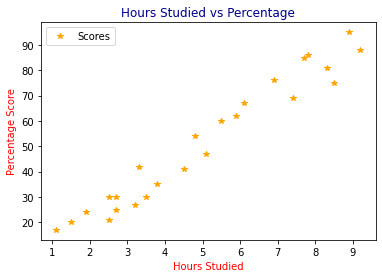

In [ ]:
sample_data.plot(x='Hours', y='Scores', style='*',color='orange')  
plt.title('Hours Studied vs Percentage',color='darkblue')  
plt.xlabel('Hours Studied',color='red')  
plt.ylabel('Percentage Score',color='red')  
plt.legend(loc=0)
plt.show()

**This plot infers that there is a positive Linear Regression between Hours studies and Percentage score**

**Data Preparation for Training**

In [ ]:
x = sample_data.iloc[:, :-1].values  
y = sample_data.iloc[:, 1].values 

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.1, random_state=0) 

**Traing the Algorithm with the training part of the Dataset**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Training complete.")

Training complete.


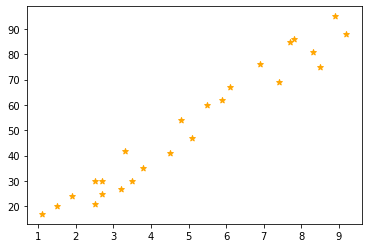

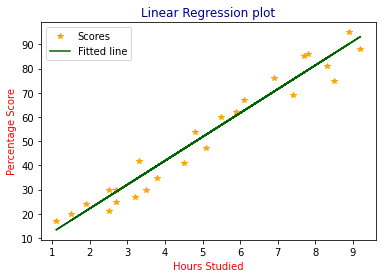

In [ ]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y, label='Scores',color='orange',marker='*')
sample_data.plot(x='Hours', y='Scores', style='*',color='orange')  
plt.plot(x, line,label='Fitted line',color='darkgreen')
plt.title('Linear Regression plot',color='darkblue')
plt.xlabel('Hours Studied',color='red')  
plt.ylabel('Percentage Score',color='red')  
plt.legend(loc=0)
plt.show()

**Predictions**

In [ ]:
print(x_test) 
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]]


**Actual data and Predicted value comparison**

In [ ]:
df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred})  
print(df)

   Actual Value  Predicted value
0            20        17.302210
1            27        34.055294
2            69        75.445267


**Testing of the trained model**

In [ ]:
hours=float(input())
value=pd.Series(hours)
predicted_value=regressor.predict(value.values.reshape(1,-1))
print("Predicted Score for the student if he studied for "+str(hours)+" hours = {0} ".format(predicted_value[0]))

9.25
Predicted Score for the student if he studied for 9.25 hours = 93.67656425238496 


**Evaluation of the model**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Adjusted R Square:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 5.3994503136120064
Adjusted R Square: 0.9298077534821835
